In [1]:
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit_ibm_provider import IBMProvider
from qiskit.providers.ibmq import least_busy

In [3]:
provider = IBMProvider(token = 'c9ed2586275719bbca2a97be4856410ccaa85bb510346f30d3564e274fe21ddc76430e63553405f85b0ee7335a3d108a869dcf379cc7decfd4f2c366247ff787')

{'0001': 1008, '0010': 1000, '0000': 1018, '0111': 974}


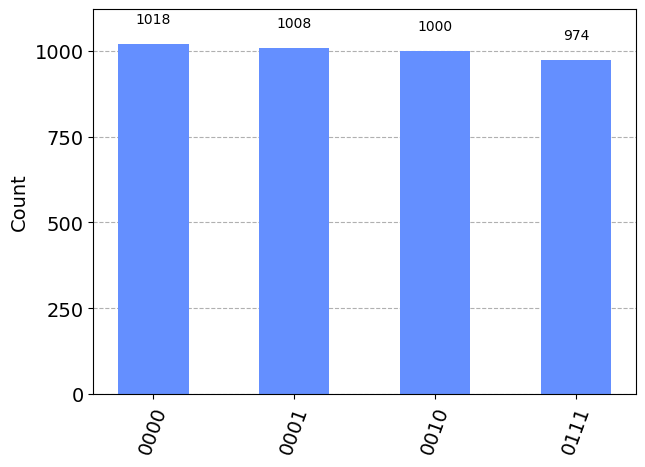

In [4]:
# Create a circuit
qc = QuantumCircuit(4)
qc.h([0,1])
qc.cx(0, 1)
qc.ccx(0,1,2)
qc.measure_all()

# Select a backend.
backend = provider.get_backend("ibmq_qasm_simulator")

# Transpile the circuit
transpiled = transpile(qc, backend=backend)

# Submit a job.
job = backend.run(transpiled)
# Get results.
print(job.result().get_counts())
plot_histogram(job.result().get_counts())

In [5]:
provider.backends()

[<IBMBackend('simulator_stabilizer')>,
 <IBMBackend('ibm_perth')>,
 <IBMBackend('ibm_brisbane')>,
 <IBMBackend('simulator_mps')>,
 <IBMBackend('simulator_extended_stabilizer')>,
 <IBMBackend('simulator_statevector')>,
 <IBMBackend('ibm_nairobi')>,
 <IBMBackend('ibm_lagos')>,
 <IBMBackend('ibmq_qasm_simulator')>]

In [6]:
least_busy(provider.backends())

<IBMBackend('simulator_stabilizer')>

In [26]:
backend2 = provider.get_backend('simulator_statevector')

In [27]:
result = execute(qc,backend=backend2).result()

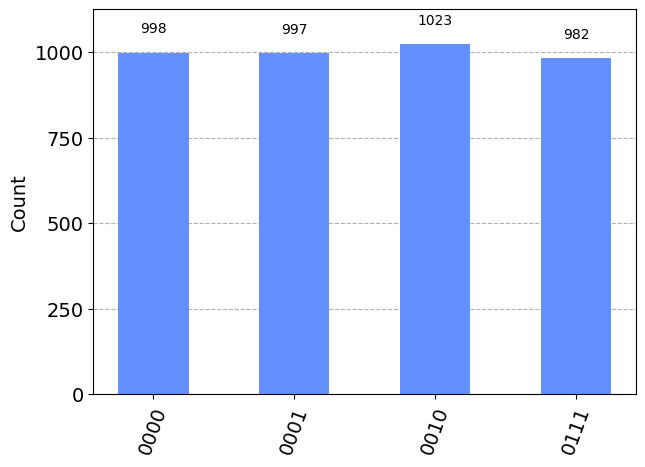

In [28]:
counts = result.get_counts()
plot_histogram(counts)